# Models profiling

## Import libraries and models

In [13]:
import mlflow

import pandas as pd
import numpy as np
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
from sklearn.cluster import KMeans, DBSCAN
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

LOVES_MODEL_PATH = 'runs:/2ad5c2d2063b42c090ab80a5b9704402/LOVES_model'

# Load model as a PyFuncModel.
LOVES_MODEL = mlflow.pyfunc.load_model(LOVES_MODEL_PATH)

In [3]:
# ['minmax_amt_gms', 'rt_claims_year', 'rt_premiums_year', 'sqrt_amt_gms', 'PCA2_', 'atr_credit_score_proxy', 'atr_cust_age'] 42b05ce5d54241f483974e564757e97e
# ['norm_amt_gms', 'rt_premiums_year', 'rt_claims_year', 'atr_credit_score_proxy', 'minmax_atr_cust_age', 'PCA2_', 'atr_cust_age'] 2ad5c2d2063b42c090ab80a5b9704402

In [4]:
LOVES_MODEL

mlflow.pyfunc.loaded_model:
  artifact_path: LOVES_model
  flavor: mlflow.sklearn
  run_id: 2ad5c2d2063b42c090ab80a5b9704402

In [5]:
DATA_PATH = "../data/20220413-234639_dataset.csv"
dfInsurance = pd.read_csv(DATA_PATH)

In [6]:
dfInsurance['LOVES_CLUSTERS'] = LOVES_MODEL.predict(pd.DataFrame(dfInsurance[['norm_amt_gms', 'rt_premiums_year', 'rt_claims_year', 'atr_credit_score_proxy', 'minmax_atr_cust_age', 'PCA2_', 'atr_cust_age']]))
METRIC_FEATURES = ['amt_plob_motor', 'amt_plob_household', 'amt_plob_life', 'amt_plob_health', 'amt_plob_wcomp', 'amt_gms']

In [7]:
dfInsurance['LOVES_CLUSTERS'].value_counts()

3    2881
1    2828
0    2364
2    2171
Name: LOVES_CLUSTERS, dtype: int64

## Visualise LOVES model

In [8]:
sns.set(rc={"figure.figsize":(35, 20)}) #width=8, height=4

C:\.conda\envs\CloserChallenge\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\.conda\envs\CloserChallenge\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\.conda\envs\CloserChallenge\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\.conda\envs\CloserChallenge\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


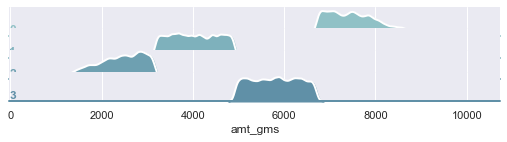

In [11]:
FEATURE = 'amt_gms'

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(dfInsurance, row="LOVES_CLUSTERS", hue="LOVES_CLUSTERS", aspect=15, height=.5, palette=pal)


# Draw the densities in a few steps
g.map(sns.kdeplot, FEATURE,
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, FEATURE, clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, FEATURE)

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

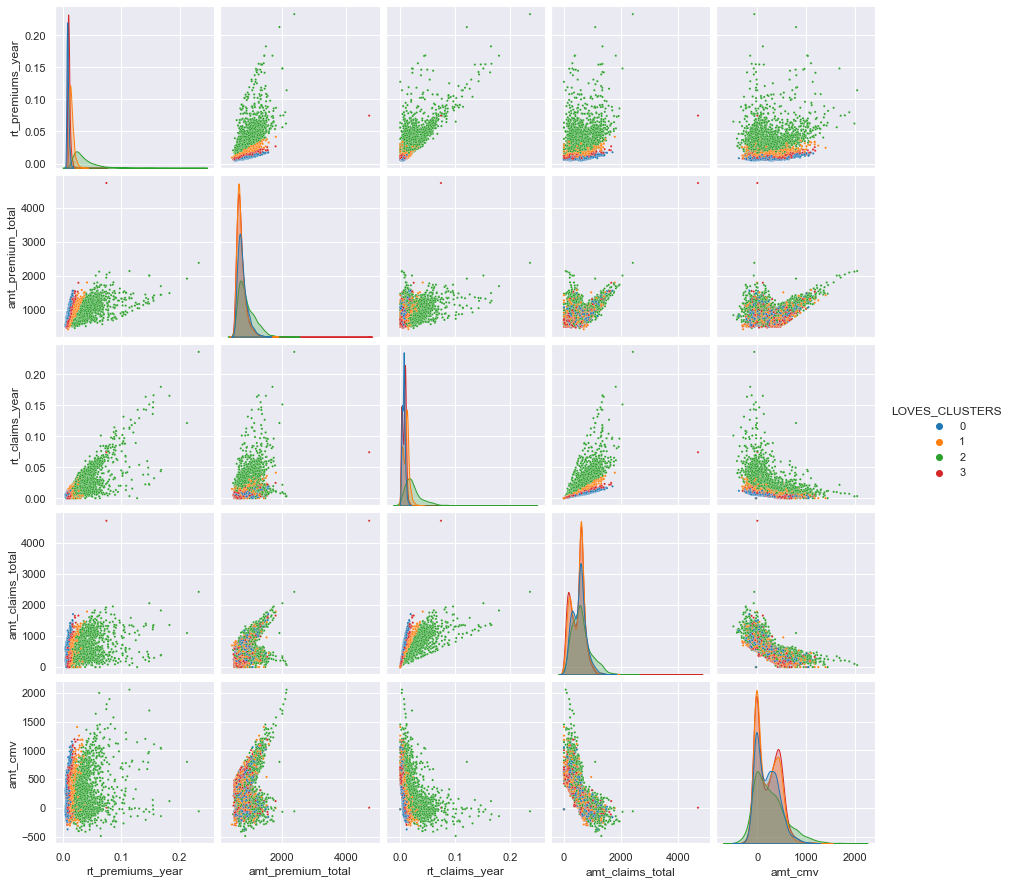

In [10]:
pp = sns.pairplot(data=dfInsurance,
                  y_vars=['rt_premiums_year', 'amt_premium_total',  'rt_claims_year', 'amt_claims_total', 'amt_cmv'],
                  x_vars=['rt_premiums_year', 'amt_premium_total',  'rt_claims_year', 'amt_claims_total', 'amt_cmv'],
                 hue = 'LOVES_CLUSTERS', palette='tab10', plot_kws={'s':5})

## SCORER Model

Kmeans
b74f81bf0d8c45d387c24ee052f5bdc1   
a5b149880c024116aecf879a8988f2d8

DBSCAN
8e51367ebac54519bb4209dc490b2178

In [125]:
SCORER_DBSCAN_MODEL_PATH = 'runs:/76d7c972fa3d4bda8c672c2c5d1f54e3/SCORER_model'

# Load model as a PyFuncModel.
SCORER_MODEL = mlflow.sklearn.load_model(SCORER_DBSCAN_MODEL_PATH)

In [195]:
dfInsurance.columns[0:90]

Index(['cod_cust_id', 'dt_fpy', 'atr_cust_age', 'dsc_edu_deg', 'amt_gms',
       'atr_gla', 'flg_children', 'amt_cmv', 'rt_cr', 'amt_plob_motor',
       'amt_plob_household', 'amt_plob_health', 'amt_plob_life',
       'amt_plob_wcomp', 'Set', 'amt_premium_total', 'outlier_candidate',
       'atr_edu_deg', 'atr_fpy_to_date', 'rt_plob_life', 'rt_plob_household',
       'rt_plob_motor', 'rt_plob_health', 'rt_plob_wcomp', 'amt_gys',
       'amt_claims_total', 'rt_premiums_year', 'rt_claims_year',
       'atr_credit_score_proxy', 'fe_bin_plob_motor',
       'fe_amt_plob_motor_scale', 'fe_bin_cmv_motor', 'fe_cmv_motor_scale',
       'log_amt_plob_motor', 'minmax_amt_plob_motor', 'norm_amt_plob_motor',
       'log_rt_plob_motor', 'fe_bin_plob_household',
       'fe_amt_plob_household_scale', 'fe_bin_cmv_household',
       'fe_cmv_household_scale', 'log_amt_plob_household',
       'minmax_amt_plob_household', 'norm_amt_plob_household',
       'log_rt_plob_household', 'fe_bin_plob_life', 'fe_am

In [196]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
sd_scaler = StandardScaler()

dfInsurance['minmax_amt_cmv'] = scaler.fit_transform(dfInsurance[['amt_cmv']])
dfInsurance['norm_amt_cmv'] = sd_scaler.fit_transform(dfInsurance[['amt_cmv']])

In [230]:
dbscan_kwargs = {
            "eps":0.045,
            "metric": "euclidean",
            "algorithm": 'kd_tree',
            "min_samples": 17}
dbscan_model = DBSCAN(**dbscan_kwargs)
dbscan_model.fit(dfInsurance[['log_rt_plob_household', 'log_rt_plob_motor', 'rt_premiums_year', 'rt_plob_household', 'log_rt_plob_wcomp', 'rt_cr']])
dfInsurance['SCORER_DBSCAN_1'] = dbscan_model.labels_
dfInsurance['SCORER_DBSCAN_1'].value_counts()

-1    5289
 0    4782
 1      58
 5      24
 4      17
 6      14
 7      13
 9      13
 3      13
 8      12
 2       9
Name: SCORER_DBSCAN_1, dtype: int64

In [170]:
SCORER_MODEL.fit(dfInsurance[['log_rt_plob_household', 'log_rt_plob_motor', 'rt_premiums_year', 'rt_plob_household', 'log_rt_plob_wcomp', 'rt_cr']])

DBSCAN(algorithm='kd_tree', eps=0.2, min_samples=17)

In [142]:
dfInsurance['SCORER_DBSCAN_1'] = SCORER_MODEL.labels_

In [164]:
dfInsurance['SCORER_DBSCAN_1'].value_counts()

 0     5769
-1     4268
 1       28
 7       28
 5       19
 10      16
 6       16
 2       14
 9       13
 8       12
 13      12
 3       12
 11      12
 12      10
 4       10
 14       5
Name: SCORER_DBSCAN_1, dtype: int64

In [213]:
A = ['atr_cust_age', 'amt_gms', 'amt_cmv', 'amt_premium_total', 'flg_children', 'atr_gla']
B = ['amt_plob_motor', 'amt_plob_household', 'amt_plob_life', 'amt_plob_health', 'amt_plob_wcomp','flg_children', 'atr_gla']

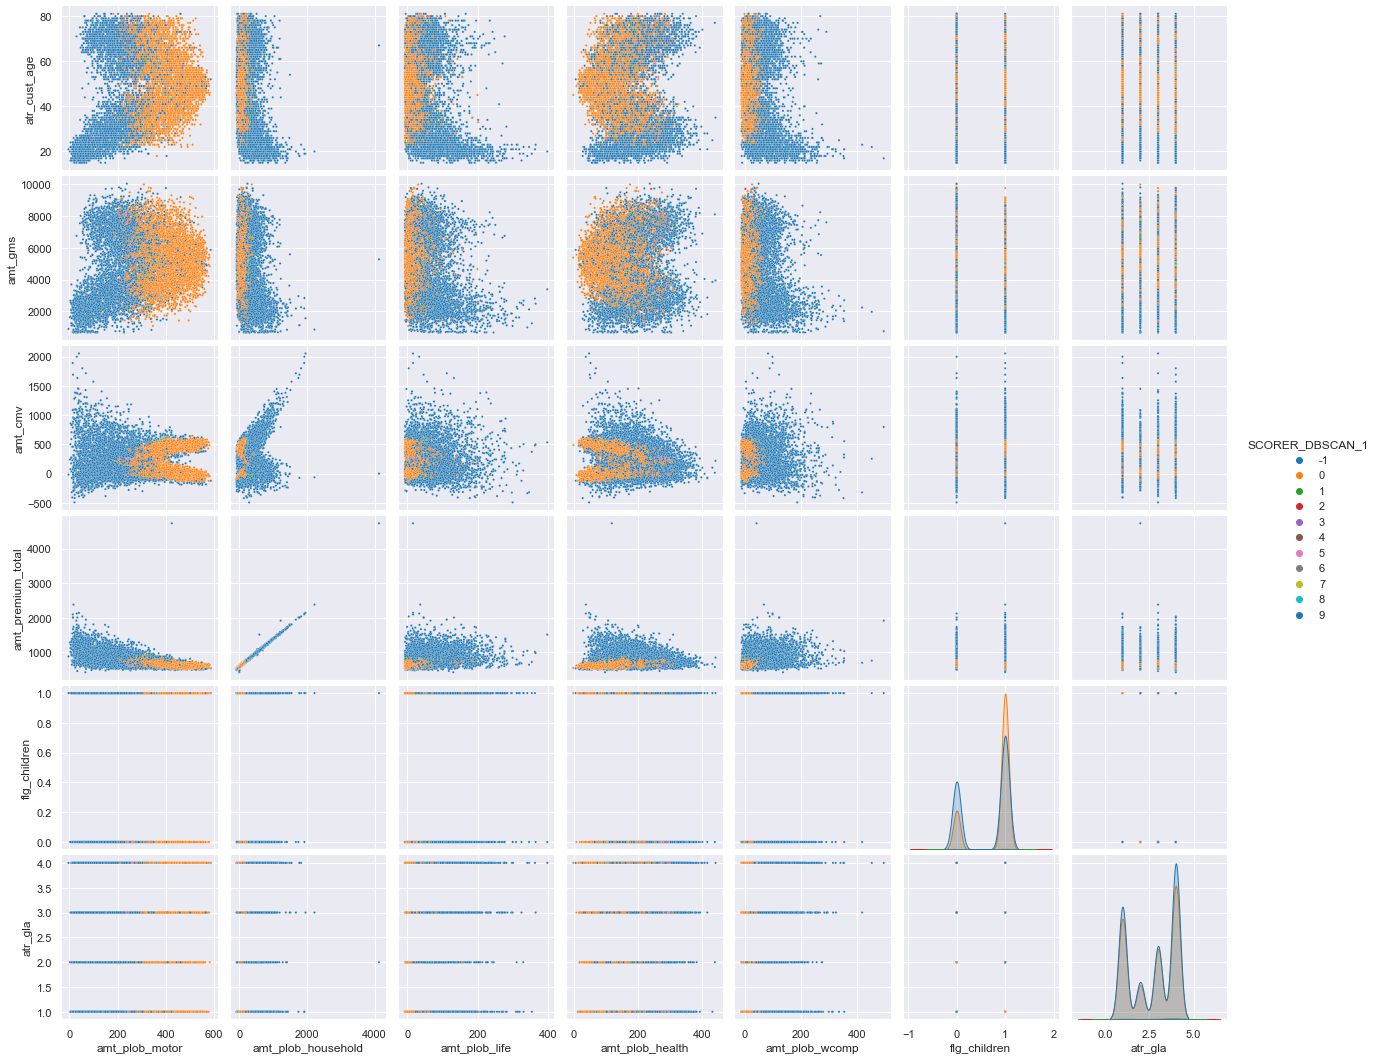

In [231]:
pp = sns.pairplot(data=dfInsurance,
                  y_vars= A,
                  x_vars= B,
                 hue = 'SCORER_DBSCAN_1', palette='tab10', plot_kws={'s':5})

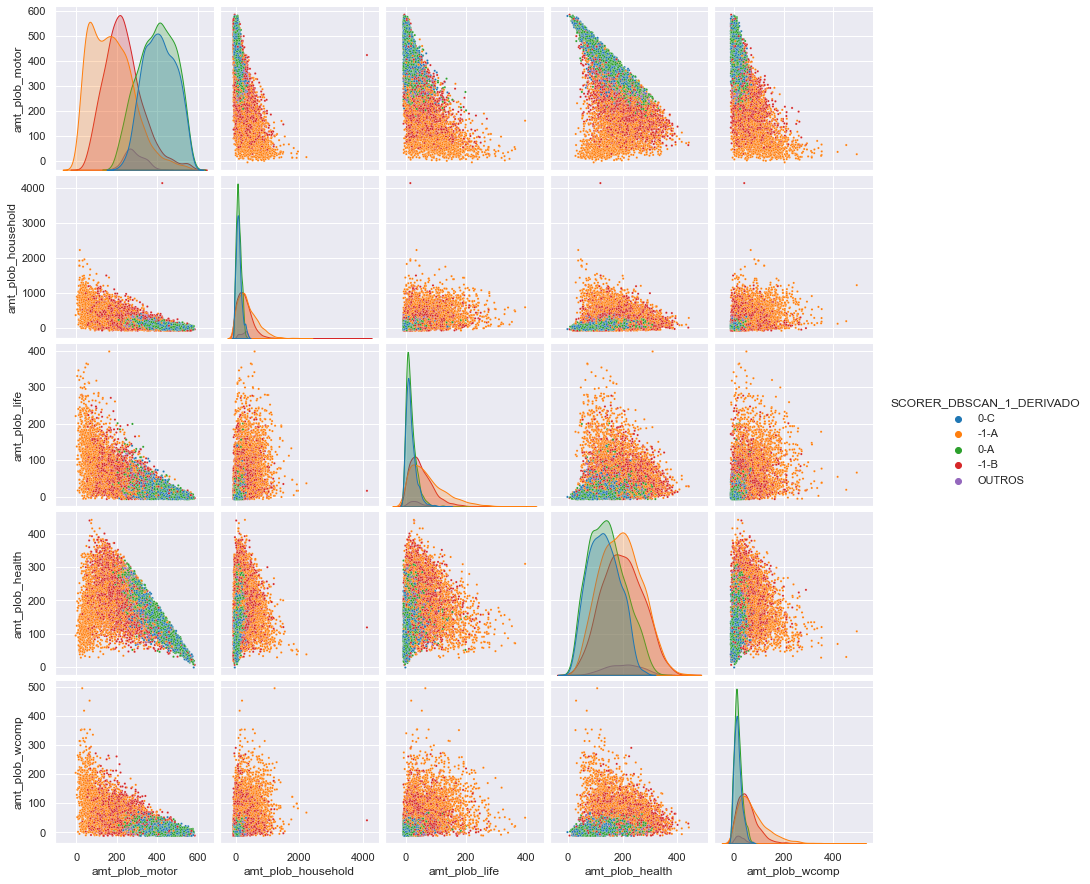

In [184]:
pp = sns.pairplot(data=dfInsurance,
                  y_vars= B,
                  x_vars= B,
                 hue = 'SCORER_DBSCAN_1_DERIVADO', palette='tab10', plot_kws={'s':5})

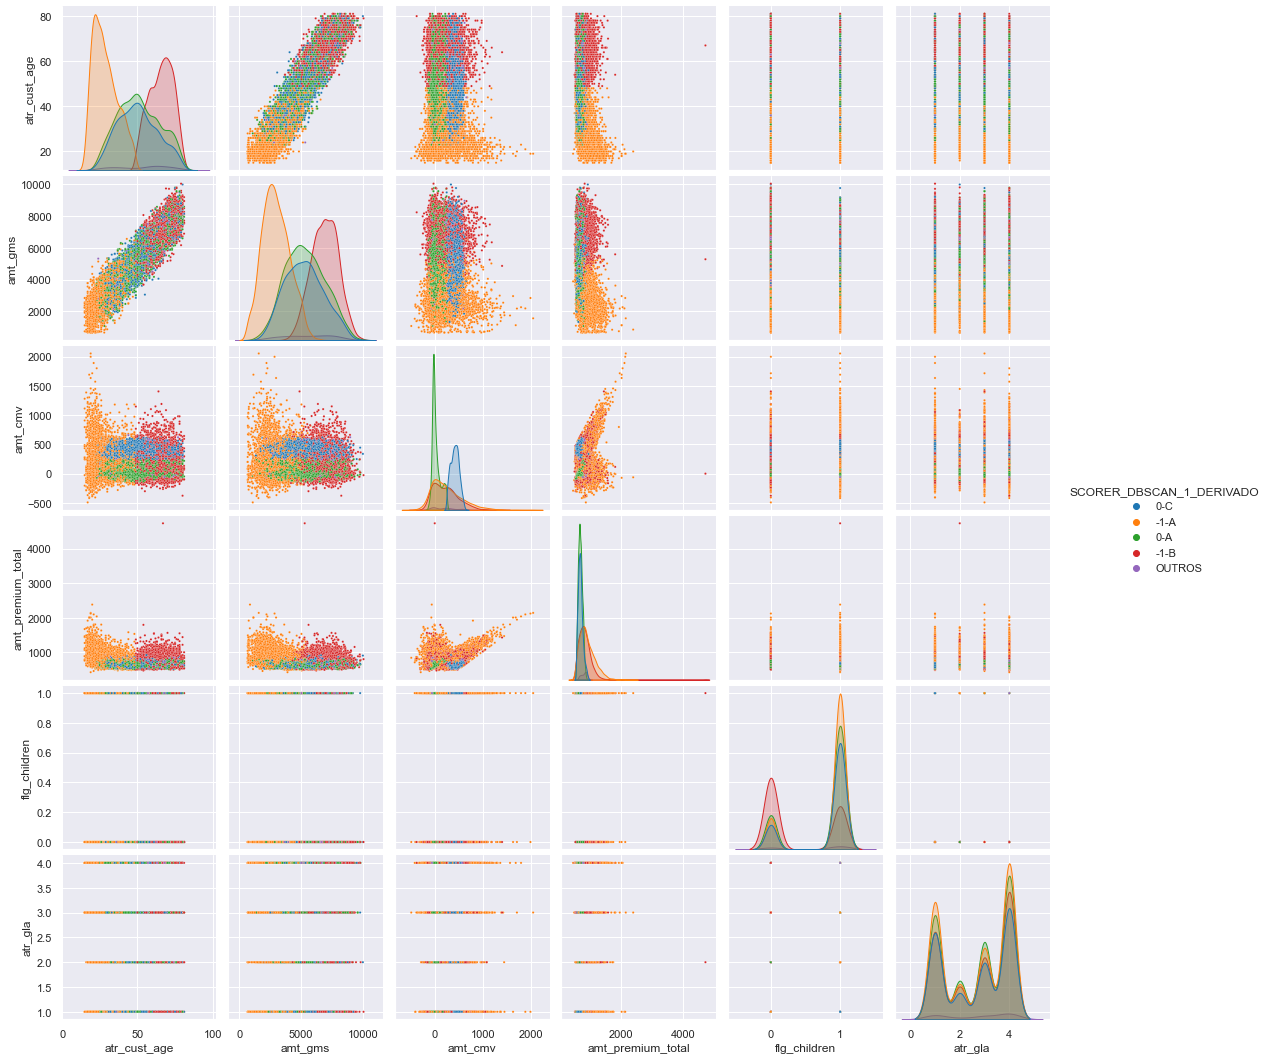

In [216]:
pp = sns.pairplot(data=dfInsurance,
                  y_vars= A,
                  x_vars= A,
                 hue = 'SCORER_DBSCAN_1_DERIVADO', palette='tab10', plot_kws={'s':5})

In [182]:
# https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions
conditions = [(dfInsurance['SCORER_DBSCAN_1'] == -1) & (dfInsurance['atr_cust_age'] < 49), 
              (dfInsurance['SCORER_DBSCAN_1'] == -1) & (dfInsurance['atr_cust_age'] >= 49), 
              (dfInsurance['SCORER_DBSCAN_1'] == 0) & (dfInsurance['amt_cmv'] < 250),
              (dfInsurance['SCORER_DBSCAN_1'] == 0) & (dfInsurance['amt_cmv'] >= 250)]
choices = [ "-1-A", '-1-B', '0-A', '0-C']

dfInsurance["SCORER_DBSCAN_1_DERIVADO"] = np.select(conditions, choices, default='OUTROS')

In [218]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
METRIC_FEATURES = ['atr_cust_age', 'amt_gms', 'amt_cmv', 'amt_premium_total']

print(silhouette_score(dfInsurance[METRIC_FEATURES],dfInsurance["SCORER_DBSCAN_1_DERIVADO"]))
print(calinski_harabasz_score(dfInsurance[METRIC_FEATURES], dfInsurance["SCORER_DBSCAN_1_DERIVADO"]))
print(davies_bouldin_score(dfInsurance[METRIC_FEATURES], dfInsurance["SCORER_DBSCAN_1_DERIVADO"]))

0.0672445363640417
2745.7496201239605
6.808735174834996


In [212]:
dfInsurance["SCORER_DBSCAN_1_DERIVADO"].value_counts()

-1-A      2841
0-A       2681
-1-B      2353
0-C       2193
OUTROS     176
Name: SCORER_DBSCAN_1_DERIVADO, dtype: int64

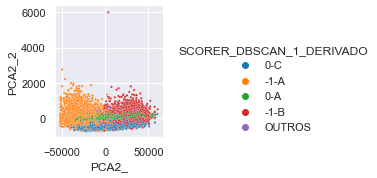

In [211]:
pp = sns.pairplot(data=dfInsurance,
                  x_vars= ['PCA2_'],
                  y_vars= ['PCA2_2'],
                 hue = 'SCORER_DBSCAN_1_DERIVADO', palette='tab10', plot_kws={'s':5})